In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

Making a function to plot the meshgrid which takes input as max_depth parameter and we will see the affect of this hyperparameter

In [2]:
 def analyzer(max_depth):
        data = pd.read_csv('/Users/rajatchauhan/Desktop/Machine Learning Notes/Datasets/Social_Network_Ads.csv')
        # taking two features only
        X = data.iloc[:,2:4].values
        y = data.iloc[:,-1].values
        
        # Fitting the data to the Decision Tree Classifier
        
        clf = DecisionTreeClassifier(max_depth = max_depth)
        clf.fit(X,y)
        
        a = np.arange(start=X[:,0].min()-1, stop =X[:,0].max()+1, step = 0.1)
        b = np.arange(start=X[:,1].min()-1, stop =X[:,1].max()+1, step = 100)
        
        XX, YY = np.meshgrid(a,b)
        
        input_array = np.array([XX.ravel(), YY.ravel()]).T
        
        labels = clf.predict(input_array)
        
        plt.contourf(XX, YY, labels.reshape(XX.shape), alpha = 0.5)
        plt.scatter(X[:,0], X[:,1], c = y)

If we set max_depth as None means the algorithm will try to fit to the data as perfectly as possible by making a very deep tree and creating so many if else statements, this surely causes the data to get overfitted as shown below

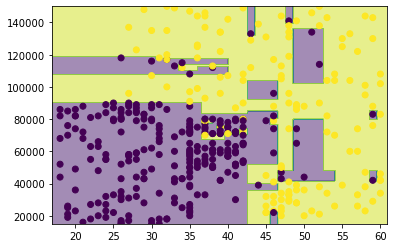

In [3]:
analyzer(max_depth = None)

We can see even the outliers are being fitted properly

Now if we set the value of depth to a very low number then it will cause Underfitting as can be seen below, the alogrithm uses just one decision boundary (or hyperplane) and is not able to classify the points properly.

So many purple points are in yellow region and so many yellow points are in purple region

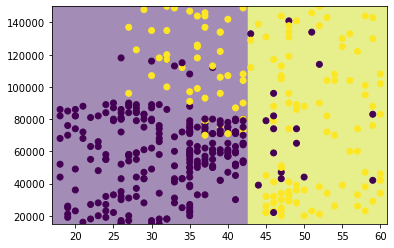

In [4]:
analyzer(max_depth = 1)

So using hyper parameter tuning we need to find out a appropriate depth of the tree (Also called as Pruning)



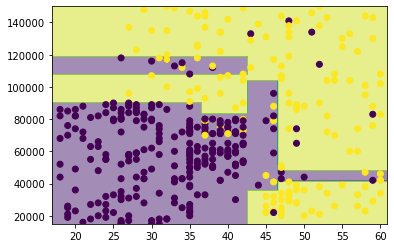

In [5]:
analyzer(max_depth = 4)